<a href="https://colab.research.google.com/github/harrybaines/ml-resources/blob/main/ml-resources/ml-with-pytorch-and-sklearn-book/chapter-notebooks/ch13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 13: Going Deeper - The Mechanics of PyTorch

Reference: Machine Learning with PyTorch and scikit-learn (https://github.com/rasbt/machine-learning-book)

In [1]:
# PyTorch performs computations based on a DAG (directed acyclic graph)

## Creating a graph in PyTorch

In [2]:
import torch

In [3]:
 # create computation graph
 def compute_z(a, b, c):
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2) # same as torch.multiply
    z = torch.add(r2, c)
    return z

In [4]:
print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))
print('Rank 1 Inputs:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))
print('Rank 2 Inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

Scalar Inputs: tensor(1)
Rank 1 Inputs: tensor([1])
Rank 2 Inputs: tensor([[1]])


## PyTorch tensor objects for storing and updating model parameters

In [5]:
# requires_grad allows you to compute gradients
a = torch.tensor(3.14, requires_grad=True) # only floating point and complex dtype can required grads!
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True) 

In [6]:
a, b

(tensor(3.1400, requires_grad=True), tensor([1., 2., 3.], requires_grad=True))

In [7]:
w = torch.tensor([1.0, 2.0, 3.0])
w.requires_grad # False by default

False

In [8]:
w.requires_grad_() # can set in-place
w.requires_grad

True

## NN weight initialization

In [9]:
# random weights: necessary to break symmetry during backprop
# (otherwise NN would be no more useful than a single-layer NN like LR)

In [10]:
# Xavier (or Glorot) initialization
import torch.nn as nn

torch.manual_seed(1)
w = torch.empty(2, 3)
nn.init.xavier_normal_(w)
w

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])

In [11]:
# random uniform/normal weight initialisation could result in poor model performance during training
# Xavier is more robust: roughly balances variance of gradients across different layers
# (otherwise some layers may get too much attention during training and other layers can lag behind)
# For Gaussian distribution initialisation, set std = root(2) / sqrt(n_in + n_out)

In [12]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, requires_grad=True) # grads computed via automatic differentiation
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)

## Computing gradients via automatic differentiation

In [13]:
# optimize NN: compute gradients of loss wrt weights (needed for SGD)
# can use gradients for diagnosing network to find out why NN is making a particular prediction

In [14]:
# automatic differentiation: implementation of chain rule for computing grads/ partial derivs of nested functions
# partial deriv: rate of change of multivariate fn (multiple input function wrt one of inputs)

In [15]:
w = torch.tensor(1.0, requires_grad=True) # variable
b = torch.tensor(0.5, requires_grad=True) # variable

x = torch.tensor([1.4]) # input
y = torch.tensor([2.1]) # input

z = torch.add(torch.mul(w, x), b) # forward pass
 
loss = (y-z).pow(2).sum() # L=(y-z)^2 squared loss (would be sum for multiple examples)
loss.backward() # compute partial derivs wrt w and b
# (computes sum of gradients of tensor with regard to leaf nodes in the graph)

print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

dL/dw :  tensor(-0.5600)
dL/db :  tensor(-0.4000)


In [16]:
2 * x * ((w * x + b) - y) # dL/dw = 2x((wx+b)-y) verifying the computed gradient dL/dw

tensor([-0.5600], grad_fn=<MulBackward0>)

In [17]:
2 * ((w * x + b) - y) # dL/db = 2((wx+b)-y) verifying the computed gradient dL/db

tensor([-0.4000], grad_fn=<MulBackward0>)

In [18]:
# automatic differentiation represents a set of computational techniques for computing gradients of
# arbitrary arithmetic operations
# grads of a computation are obtained by accumulating grads through repeated applications of the chain rule

In [19]:
# e.g. y=f(g(h(x))) (u_0=x, u_1=h(x), u_2=g(u_1), u_3=f(u_2)=y)
# dy/dx computed either:
#   1. forward accumulation: starts with du_3/dx = du_3/du_2 * du_2/du_0
#   2. reverse accumulation: starts with dy/du_0 = dy/du_1 * du_1/du_0
# 
# PyTorch uses reverse accumulation, more efficient for backprop

In [20]:
# computing gradients of loss wrt input example also used for generating adversarial examples
# (i.e. examples generated by adding small imperceptible noise to input which results in deep NN
# misclassifying them)

## `torch.nn` module for common architectures

In [21]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)

model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [22]:
# can choose activations, initialization of layer parameters, apply L1/L2 regularization

In [23]:
nn.init.xavier_uniform_(model[0].weight) # first layer
 
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum() # L1 norm of weight of second linear layer

## Choosing a loss function

In [24]:
# SGD + Adam most used optimisers
# Loss depends on task (e.g. MSE for regression)
# Cross-entropy loss: possible choice for classification
# Can use precision and recall, accuracy, AUC, FN and FP scores as metrics for evaluating classifiers

In [25]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Solving an XOR classification problem

In [26]:
# try to capture nonlinear decision boundary between 2 classes

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
np.random.seed(1)
torch.manual_seed(1)

In [61]:
x = np.random.uniform(low=-1, high=1, size=(200, 2)) # 200x2
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0 # if x*y is < 0 ? 0 : 1

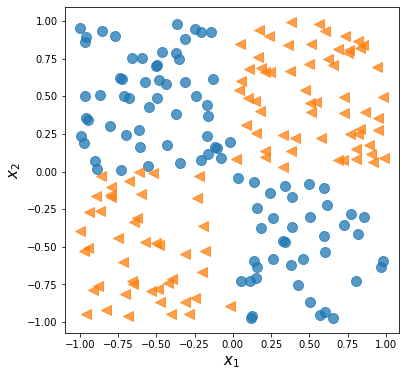

In [62]:
n_train = 100 # 100 for trainining, 100 for validation
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [63]:
# larger the model: larger the capacity of the model
# model capacity: measure of how readily the model can approximate complex functions
# more parameters = bigger network, can fit more complex functions, but prone to overfitting and harder to train
# create baseline single-layer NN like LR

In [64]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [65]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

model # will only be able to derive a linear decision boundary (simple, no hidden layers!)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [66]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [67]:
torch.manual_seed(1)
num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

In [68]:
def plot_history(history):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(1, 2, 1)
    plt.plot(history[0], lw=4)
    plt.plot(history[1], lw=4)
    plt.legend(['Train loss', 'Validation loss'], fontsize=15)
    ax.set_xlabel('Epochs', size=15)

    ax = fig.add_subplot(1, 2, 2)
    plt.plot(history[2], lw=4)
    plt.plot(history[3], lw=4)
    plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
    ax.set_xlabel('Epochs', size=15)

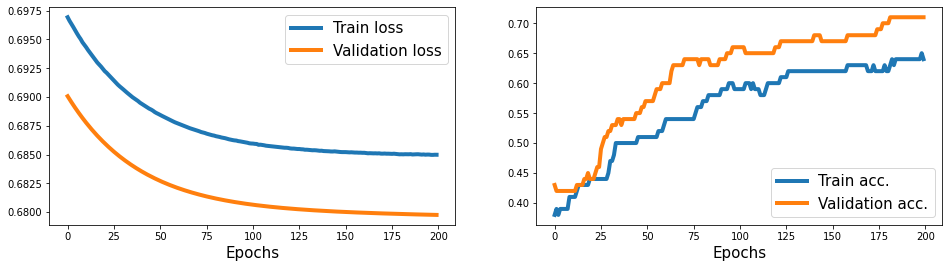

In [69]:
plot_history(history)

In [70]:
# loss on training and validation very hight, accuracy very low

In [71]:
# universal approximation theorem: feedforward NN with 1 hidden layer and a relatively large
# no. of hidden units can approximate arbitrary continuous functions relatively well

In [72]:
# tackle XOR: add hidden layer, adjust no. of neurons in hidden layer until we see good results
# on validation dataset
# can also make the model deeper (more layers) instead of just wider (more neurons in a layer)
# +ve of making a network deeper rather than wider: fewer parameters required to achieve comparable
# model capacity
# -ve: deep models prone to vanishing and exploding gradients, so harder to train

In [73]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
 
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model # 2 hidden layers

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [74]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

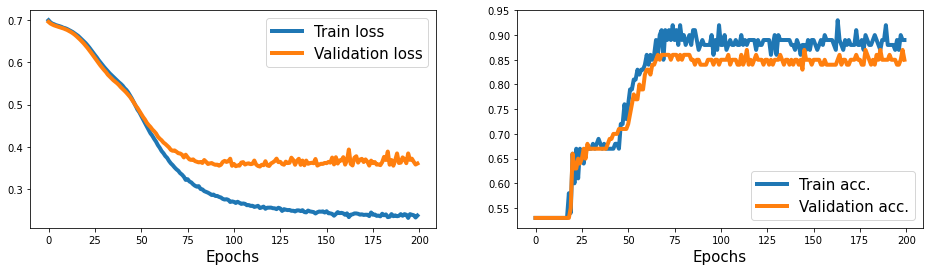

In [75]:
plot_history(history)

In [76]:
# model is able to derive a nonlinear decision boundary, nearly 100% accuracy on training
# validation accuracy slightly less, therefore model is slightly overfitting

## Making model more flexible with ``nn.Module``

In [77]:
# more flexible than Sequential

In [79]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l) # list of nn.Module items

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

In [80]:
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [81]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

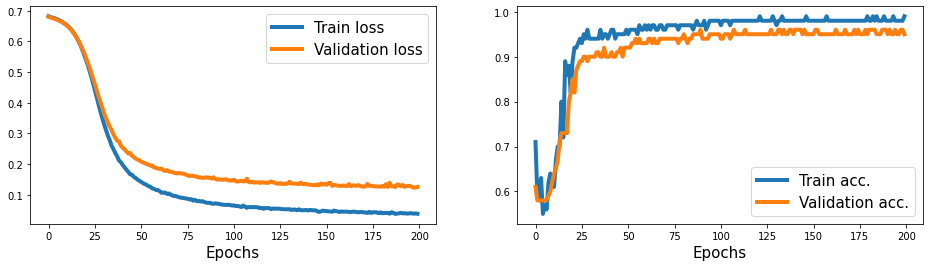

In [82]:
torch.manual_seed(1)
history = train(model, num_epochs, train_dl, x_valid, y_valid)
plot_history(history)

In [84]:
# handy for visualising validation data and decision boundary
# !pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


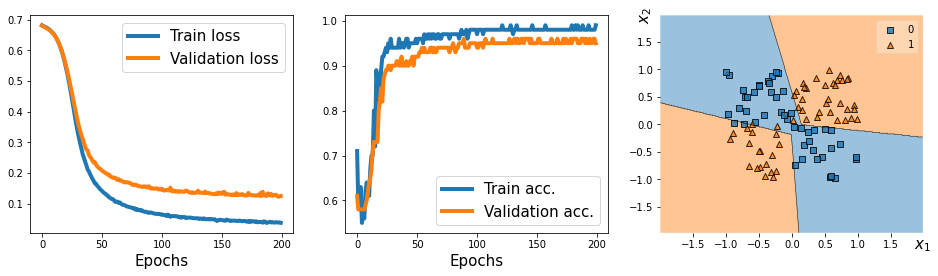

In [85]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## Custom layers in PyTorch

In [86]:
# e.g. w(x+epislon)+b (epsilon refers to random variable as noise variable)

In [89]:
class NoisyLinear(nn.Module): # can be used like any other torch.nn layer
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter is a Tensor that's a module parameter.
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev # std for distribution of epsilon (sampled from Gaussian)

    def forward(self, x, training=False): # training=False: inference
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise) # add noise to input only if we are training
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)

In [91]:
## testing:
torch.manual_seed(1)
noisy_layer = NoisyLinear(4, 2)
 
x = torch.zeros((1, 4))

print(noisy_layer(x, training=True))
print(noisy_layer(x, training=True))
print(noisy_layer(x, training=False)) # [0,0] because no noise added

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)
tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [92]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07) # first hidden layer of MLP
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
        
    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

In [93]:
torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [94]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
torch.manual_seed(1)

loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0] # instead of pred=model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_hist_train[epoch] += is_correct.mean()

    loss_hist_train[epoch] /= n_train/batch_size
    accuracy_hist_train[epoch] /= n_train/batch_size

    pred = model(x_valid)[:, 0] # evaluate model on validation data
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

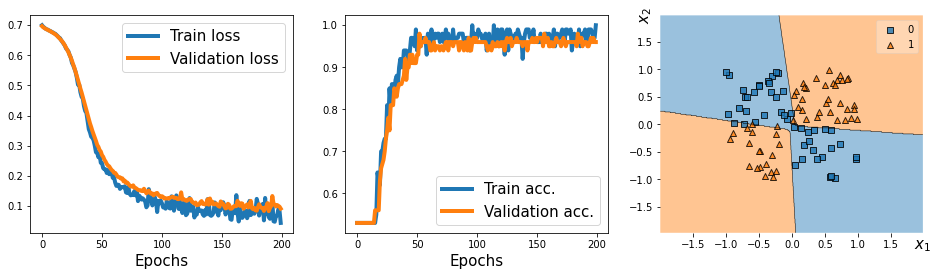

In [95]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [96]:
# NoisyLineaer didn't help improve performance, just to demonstrate an example custom layer!
# useful to create customised layer for new algorithm when layer doesn't exist

## Project 1: predicting fuel efficiency of a car